##### Pratyush Kaushal
##### 21BCE2198

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Understanding the data

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
36,Female,42,34,17
137,Male,32,73,73
134,Male,20,73,5
174,Female,52,88,13
173,Male,36,87,92
42,Male,48,39,36
10,Male,67,19,14
156,Male,37,78,1
121,Female,38,67,40
178,Male,59,93,14


# Data Preprocessing

## Outlier Detection and Replacement

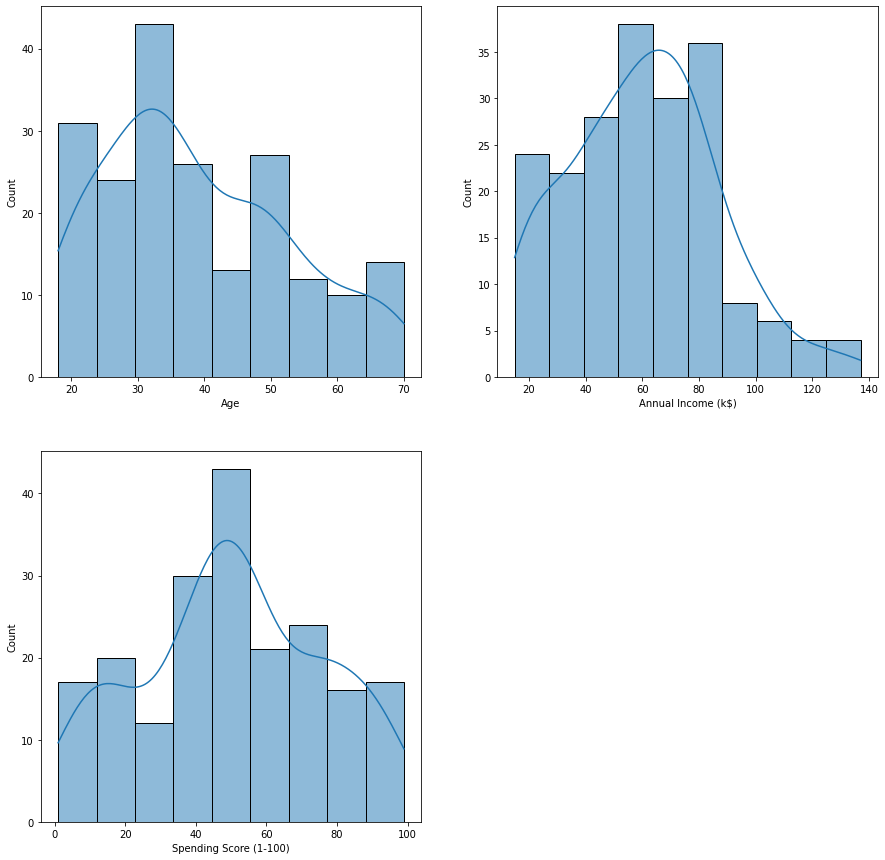

In [8]:
numeric_cols=['Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(15,15))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col],kde=True)
plt.show()

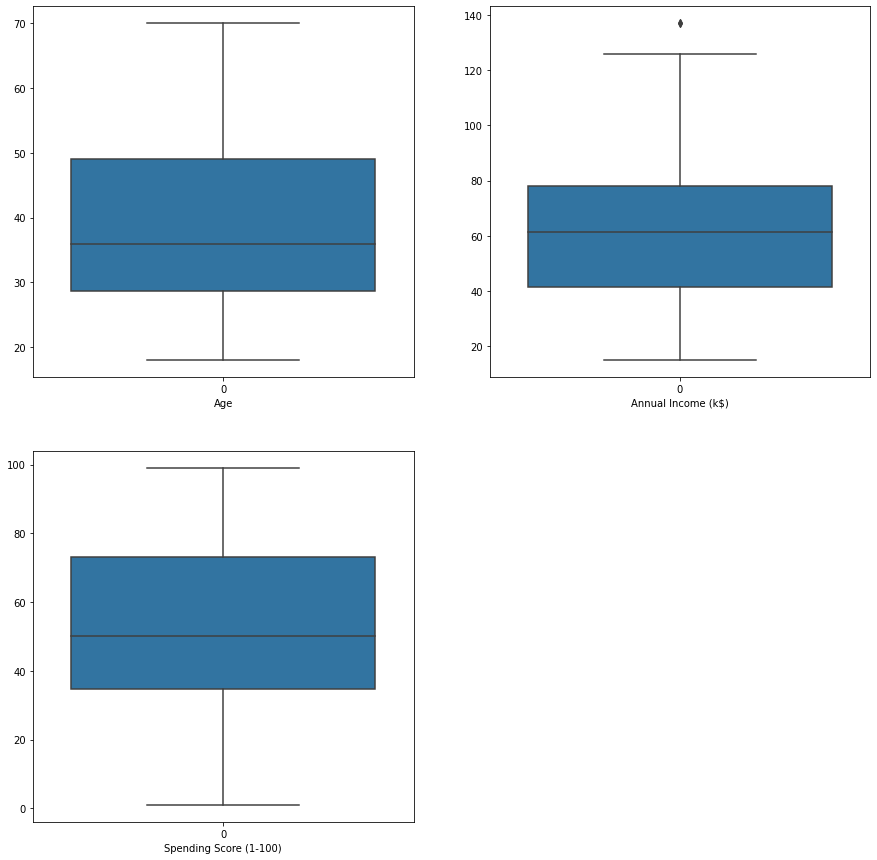

In [9]:
numeric_cols=['Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(15,15))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [10]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1
median=df['Annual Income (k$)'].median()

upperlimit=q3+1.5*IQR

df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upperlimit,median,df['Annual Income (k$)'])

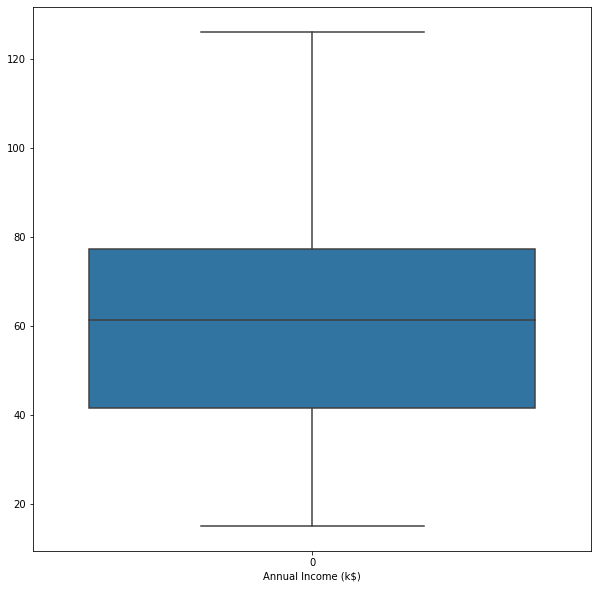

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.show()

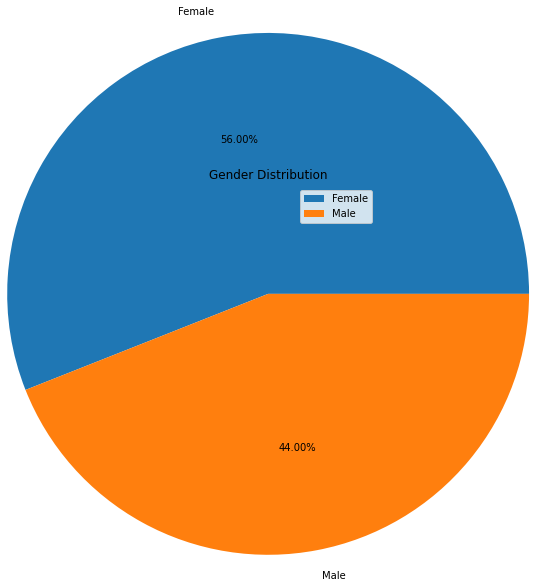

In [12]:
pie_data=df['Gender'].value_counts()
plt.pie(pie_data,labels=pie_data.keys(),radius=3,autopct='%.2f%%')
plt.title('Gender Distribution',loc='center')
plt.legend()
plt.show()

## Encoding Categorical Column

In [13]:
gender_dic={'Female':0,'Male':1}

df['Gender'].replace(gender_dic,inplace=True)

In [14]:
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
74,1,59,54.0,47
84,0,21,54.0,57
125,0,31,70.0,77
147,0,32,77.0,74
108,1,68,63.0,43
4,0,31,17.0,40
168,0,36,87.0,27
77,1,40,54.0,48
186,0,54,101.0,24
188,0,41,103.0,17


In [15]:
df.dtypes

Gender                      int64
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

## Checking Correlation

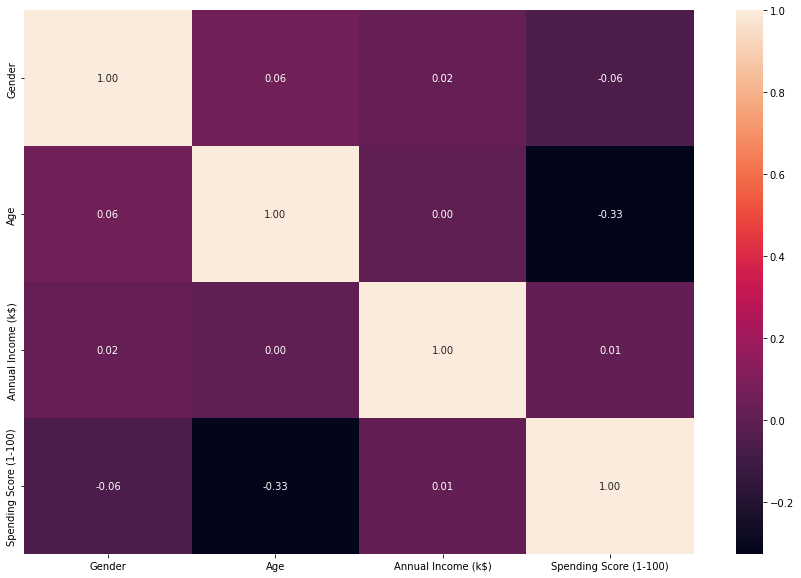

In [16]:
correlation=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.show()

## Scaling the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df_scaled=pd.DataFrame(mm.fit_transform(df),columns=df.columns)

In [18]:
df_scaled.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
48,0.0,0.211538,0.225225,0.418367
158,1.0,0.307692,0.567568,0.000000
99,1.0,0.038462,0.414414,0.489796
21,1.0,0.134615,0.081081,0.734694
139,0.0,0.326923,0.531532,0.724490
125,0.0,0.250000,0.495495,0.775510
72,0.0,0.807692,0.315315,0.489796
59,1.0,0.673077,0.279279,0.459184
144,1.0,0.134615,0.558559,0.112245
136,0.0,0.500000,0.522523,0.061224


### Multicollinearity is not present

# Machine Learning approach with clustering algorithm

In [19]:
from sklearn.cluster import KMeans

In [20]:
error=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit(df_scaled)
    error.append(kmean.inertia_)

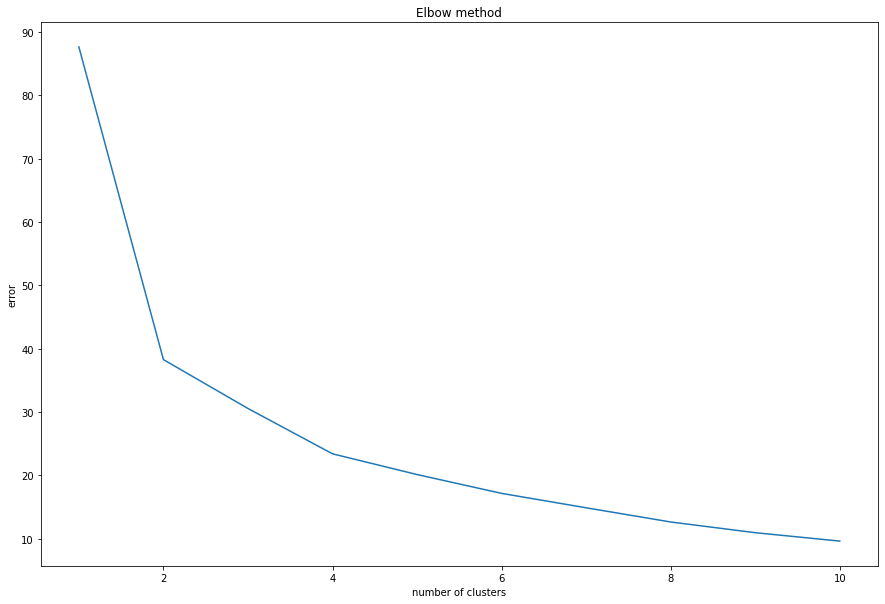

In [21]:
plt.figure(figsize=(15,10))
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

### So Number of clusters should be 4

In [22]:
model=KMeans(n_clusters=4,init='k-means++',random_state=0)
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

In [23]:
model.predict(df_scaled)

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3])

## Testing With Random Observations

In [24]:
model.predict([[1,0.25,0.351,0.469]])

array([3])

In [25]:
model.predict([[0,0.51,0.594,0.091]])

array([2])